## 1. Data loading, exploration, and preparation for analysis

First, we will import the necessary libraries, load the datasets, and standardize the column names to snake_case format for convenient processing.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Data loading
ORDERS_DATA_PATH = "./data/orders.csv"
SUPPLIERS_DATA_PATH = "./data/product-supplier.csv"

orders_df = pd.read_csv(ORDERS_DATA_PATH)
suppliers_df = pd.read_csv(SUPPLIERS_DATA_PATH)

# Column name standardization
for df in [orders_df, suppliers_df]:
    df.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

#### 1.1 Review and preparation of the orders dataset

In [4]:
# Let’s take a look at how and what kind of data is stored in the orders dataset
orders_df.head()

,customer_id,customer_status,date_order_was_placed,delivery_date,order_id,product_id,quantity_ordered,total_retail_price_for_this_order,cost_price_per_unit
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70
1,7574,SILVER,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95
2,28861,Gold,01-Jan-17,04-Jan-17,123000871,230100500068,1,1.7,0.80
3,43796,Gold,01-Jan-17,06-Jan-17,123002851,220100100633,1,47.9,24.05
4,54673,Gold,01-Jan-17,04-Jan-17,123003607,220200200043,1,36.9,18.30


In [6]:
orders_df_shape = orders_df.shape
print(f"Dataset contains {orders_df_shape[0]} rows and {orders_df_shape[1]} columns")

Dataset contains 185013 rows and 9 columns


In [7]:
# Checking for missing values
order_missing_values = orders_df.isna().sum()
order_missing_values

customer_id                          0
customer_status                      0
date_order_was_placed                0
delivery_date                        0
order_id                             0
product_id                           0
quantity_ordered                     0
total_retail_price_for_this_order    0
cost_price_per_unit                  0
dtype: int64

Conclusion: The dataset does not contain any missing values.

In [8]:
# Let's review the data types stored in the orders dataset by column to determine whether any adjustments are needed for proper analysis.
orders_df.dtypes

customer_id                            int64
customer_status                       object
date_order_was_placed                 object
delivery_date                         object
order_id                               int64
product_id                             int64
quantity_ordered                       int64
total_retail_price_for_this_order    float64
cost_price_per_unit                  float64
dtype: object

Conclusion: From the results, it can be concluded that the data in the "date_order_was_placed" and "delivery_date" columns are in the wrong format, so they need to be converted to the Date type.

In [9]:
# Let's change the data type to Date in the "date_order_was_placed" and "delivery_date" columns.
date_columns = ["date_order_was_placed", "delivery_date"]  # The names of the required columns

for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col], format="%d-%b-%y")

# orders_df.head()
orders_df.dtypes

customer_id                                   int64
customer_status                              object
date_order_was_placed                datetime64[ns]
delivery_date                        datetime64[ns]
order_id                                      int64
product_id                                    int64
quantity_ordered                              int64
total_retail_price_for_this_order           float64
cost_price_per_unit                         float64
dtype: object

In [10]:
# I also consider it necessary to standardize the values in the customer_status 
# column and convert everything to lowercase, so that we have a consistent format 
# throughout and it becomes easier to work with.

orders_df.customer_status = orders_df.customer_status.apply(lambda value: value.lower())
orders_df.head()

,customer_id,customer_status,date_order_was_placed,delivery_date,order_id,product_id,quantity_ordered,total_retail_price_for_this_order,cost_price_per_unit
0,579,silver,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70
1,7574,silver,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95
2,28861,gold,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80
3,43796,gold,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05
4,54673,gold,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30


#### 1.2 Review and preparation of the product-supplier dataset

In [11]:
# Let's take a look at how and what kind of data is stored in the product-supplier dataset.
suppliers_df.head()

,product_id,product_line,product_category,product_group,product_name,supplier_country,supplier_name,supplier_id
0,210100100001,Children,Children Outdoors,"Outdoor things, Kids",Boy's and Girl's Ski Pants with Braces,NO,Scandinavian Clothing A/S,50
1,210100100002,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket,ES,Luna sastreria S.A.,4742
2,210100100003,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket Sidney,NO,Scandinavian Clothing A/S,50
3,210100100004,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Set,NO,Scandinavian Clothing A/S,50
4,210100100005,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Suit,NO,Scandinavian Clothing A/S,50


In [12]:
suppliers_df_shape = suppliers_df.shape
print(f"Dataset contains {suppliers_df_shape[0]} roes and {suppliers_df_shape[1]} columns")

Dataset contains 5504 roes and 8 columns


In [13]:
# Checking for missing values in the product-supplier dataset
suppliers_missing_values = suppliers_df.isna().sum()
suppliers_missing_values

product_id          0
product_line        0
product_category    0
product_group       0
product_name        0
supplier_country    0
supplier_name       0
supplier_id         0
dtype: int64

Conclusion: The dataset does not contain any missing values.

In [14]:
# Let's review the data types stored in the product-supplier dataset by column to determine 
# whether any adjustments are needed for proper analysis.
suppliers_df.dtypes

product_id           int64
product_line        object
product_category    object
product_group       object
product_name        object
supplier_country    object
supplier_name       object
supplier_id          int64
dtype: object

Conclusion: From the obtained data, it can be concluded that the data contains the correct types, so there is no need to change the types for this dataset.

## 2. Data analysis

### 2.1 The number of unique customers by status.

In [15]:
# Function to create a pie chart
def plot_pie_chart(data, title, colors):
    """
    Creates a pie chart for the given data

    :param data: Series with numerical values for the chart
    :param title: Title of the chart
    :param colors: List of colors for the segments
    """
    plt.figure(figsize=(4, 4))
    plt.pie(
        data, labels=data.index, autopct="%1.1f%%",
        startangle=90, colors=colors
    )
    plt.title(title)
    plt.show()

The number of unique customers by status customer_status
gold        42961
platinum     3982
silver      43737
Name: customer_id, dtype: int64
Total number of unique customers 90680


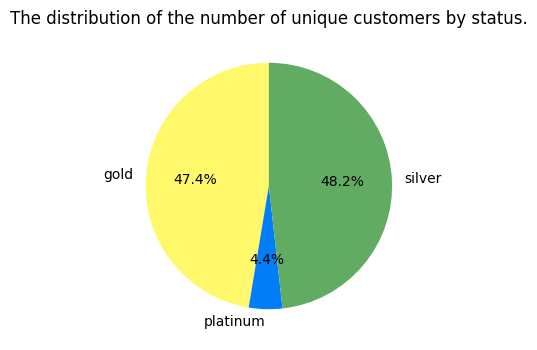

In [16]:
# We count the number of customers for each status and their total count.
unique_customers_per_status = orders_df.groupby("customer_status")["customer_id"].nunique()
total_unique_cusotmers = unique_customers_per_status.sum()
print("The number of unique customers by status", unique_customers_per_status);
print("Total number of unique customers", unique_customers_per_status.sum());

# Display on a pie chart
plot_pie_chart(unique_customers_per_status, "Distribution of the number of unique customers by status.", ["#fff86a", "#007df7", "#62ab62"])

Conclusion: From the obtained data, it is clear that with a total of 90,680 customers, we have the following distribution:
 - 43,737 customers with the Silver status, which makes up 48.2% of the total;
 - 42,961 customers with the Gold status, which makes up 47.4% of the total;
 - 3,982 customers with the Platinum status, which makes up 4.4% of the total.

### 2.2 The number of orders by status

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Number of unique orders by status customer_status
gold        88278
platinum     4194
silver      92541
Name: order_id, dtype: int64
Total unique orders 185013


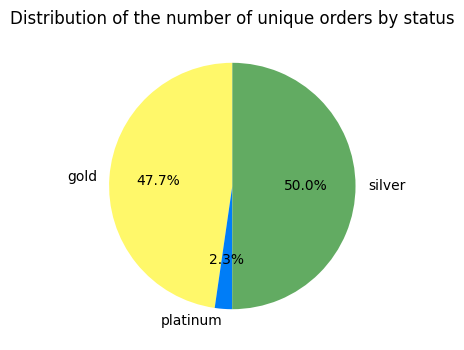

In [17]:
# We count the number of orders for each status and their total count.
unique_orders_per_status = orders_df.groupby("customer_status")["order_id"].nunique()
total_unique_orders = unique_orders_per_status.sum()
print("Number of unique orders by status", unique_orders_per_status);
print("Total unique orders", total_unique_orders.sum());

# Display on a pie chart
plot_pie_chart(unique_orders_per_status, "Distribution of the number of unique orders by status", ["#fff86a", "#007df7", "#62ab62"])

Conclusion: From the obtained data, it is clear that with a total of 185,013 orders, we have the following distribution:
 - 92,541 orders with the Silver status, which makes up 50.0% of the total;
 - 88,278 orders with the Gold status, which makes up 47.7% of the total;
 - 4,194 orders with the Platinum status, which makes up 2.3% of the total.

### 2.3 Distribution of order amounts by status

The total amount of orders:  25641503.32


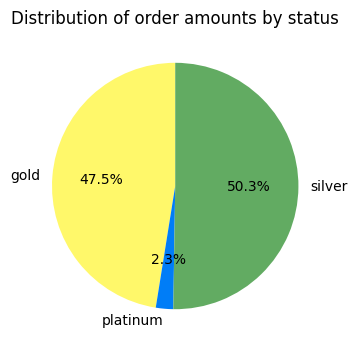

In [21]:
# We calculate the amount of orders by status
total_sales_per_status = orders_df.groupby("customer_status")["total_retail_price_for_this_order"].sum()
total_sales = round(total_sales_per_status.sum(), 2)
print("The total amount of orders: ", total_sales)

# Display on a pie chart
plot_pie_chart(total_sales_per_status, "Distribution of order amounts by status", ["#fff86a", "#007df7", "#62ab62"])

Conclusion: From the results above, it is clear that the distribution of customers, orders, and order amounts by status is approximately equal. Therefore, the main customers are those with Silver and Gold statuses. They represent the target audience that generates the most revenue.

### 2.4 Order dynamics by date

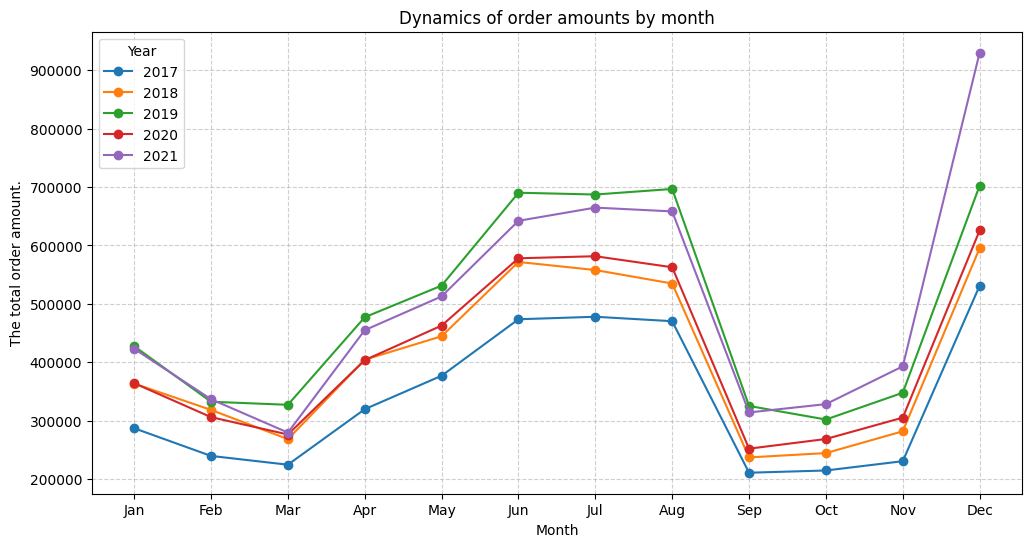

In [22]:
# Add year and month for grouping
orders_df["year"] = orders_df["date_order_was_placed"].dt.year
orders_df["month"] = orders_df["date_order_was_placed"].dt.month

# Grouping data: total orders by month for each year
monthly_sales = (
    orders_df.groupby(["year", "month"])["total_retail_price_for_this_order"]
    .sum()
    .unstack(level=0)
)

# Visualization
plt.figure(figsize=(12, 6))
for year in monthly_sales.columns:
    plt.plot(monthly_sales.index, monthly_sales[year], marker="o", label=str(year))

# Chart formatting
plt.xlabel("Month")
plt.ylabel("The total order amount.")
plt.title("Dynamics of order amounts by month")
plt.xticks(
    ticks=range(1, 13),
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Conclusion: From the obtained chart, clear seasonality is observed. It is evident that historically, the worst periods are February-March and September-November, while April-August and December bring in the highest revenue. Additionally, there is a noticeable annual increase in revenue.

### 2.5 Percentage distribution of products by product line (Product Line)

In [23]:
# Function for building a bar chart
def plot_bar_chart(data, title, xlabel, ylabel, color="#007df7"):
    """Builds a universal bar chart for the transmitted data."""
    plt.figure(figsize=(14, 5) if len(data) > 5 else (6, 4))  # Dynamic size
    plt.bar(data.index, data.values, color=color)

    #  Add signatures
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=30 if len(data) > 5 else 0)  # Rotate signatures if there is a lot of data
    plt.ylim(0, max(data.values) * 1.1)  # Automatic scaling
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    # Add percentage values above the columns
    for index, value in enumerate(data.values):
        plt.text(index, value + (max(data.values) * 0.02), f"{value:.1f}%", ha="center", fontsize=12)

    # Graph display
    plt.show()

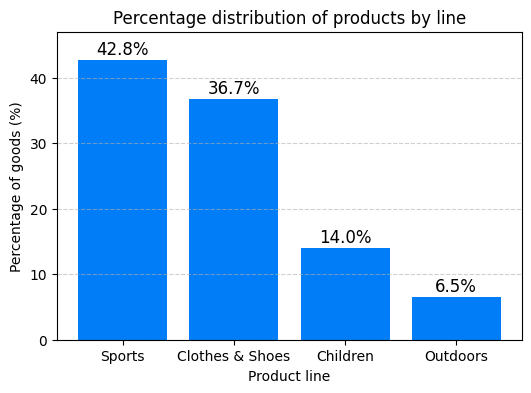

In [24]:
# Calculation of the percentage distribution of goods by line
product_distribution = suppliers_df["product_line"].value_counts(normalize=True) * 100

# Building a bar chart
plot_bar_chart(
    data=product_distribution,
    title="Percentage distribution of products by line",
    xlabel="Product line",
    ylabel="Percentage of goods (%)"
)


Conclusion: As can be seen from the resulting visualization, we have 4 product lines. The largest share is occupied by the "Sports" line - 42.8%, the smallest share is occupied by the "Outdoors" line - 6.5%.

### 2.6 Distribution of revenue by product category. Determining which product categories sell best and worst.

In [25]:
# First, we will join the tables by product_id
merged_df = pd.merge(orders_df, suppliers_df, on="product_id", how="inner")
merged_df.head()

,customer_id,customer_status,date_order_was_placed,delivery_date,order_id,product_id,quantity_ordered,total_retail_price_for_this_order,cost_price_per_unit,year,month,product_line,product_category,product_group,product_name,supplier_country,supplier_name,supplier_id
0,579,silver,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.7,2017,1,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
1,38508,silver,2017-03-11,2017-03-11,123079335,220101400106,1,46.3,20.7,2017,3,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
2,17556,gold,2017-06-09,2017-06-09,123073344,220101400106,3,138.9,20.7,2017,6,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
3,51989,gold,2017-06-16,2017-06-16,123011653,220101400106,2,92.6,20.7,2017,6,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
4,48644,gold,2017-12-12,2017-12-24,123101767,220101400106,6,277.8,20.7,2017,12,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963


In [26]:
# Group by product line and category
line_category_groups = merged_df.groupby("product_line")["product_category"].unique()

# We output the result as text
for line, categories in line_category_groups.items():
    categories_list = ", ".join(categories)
    print(f"Product line {line}: {categories_list}")

Product line Children: Children Sports
Product line Clothes & Shoes: Clothes, Shoes
Product line Outdoors: Outdoors
Product line Sports: Golf, Assorted Sports Articles, Swim Sports, Winter Sports, Running - Jogging, Indoor Sports, Team Sports, Racket Sports


We have received category names for each line. Let's see what the distribution of products is by category.

The best category: Outdoors (22.2%)
The worst category: Swim Sports (1.1%)


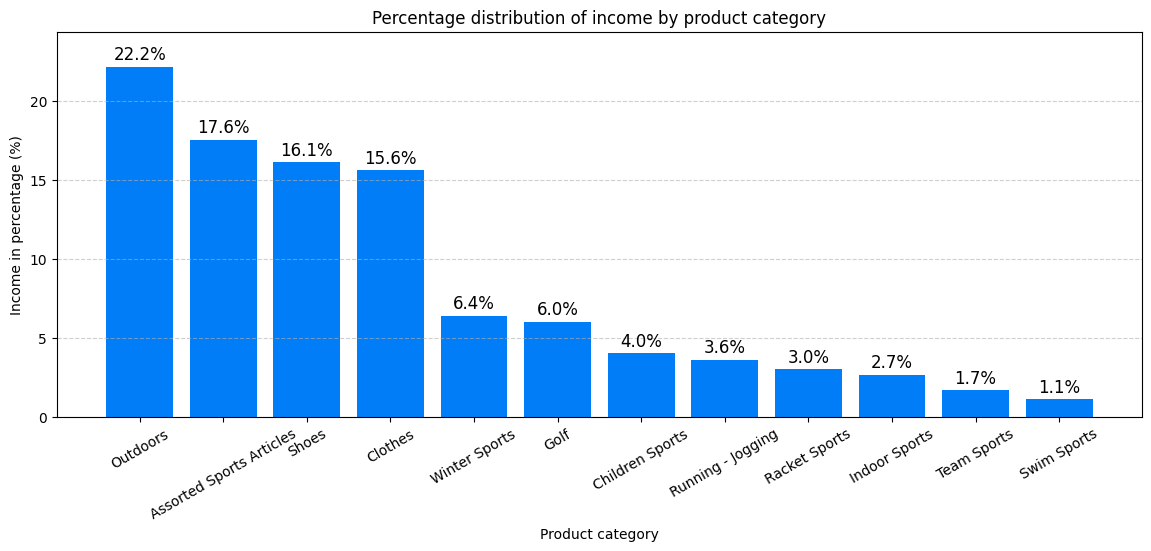

In [27]:
# We create a pivot table to calculate income by category
revenue_by_category = merged_df.pivot_table(
    values="total_retail_price_for_this_order",
    index="product_category",
    aggfunc="sum"
)

# Adding a percentage distribution
total_revenue = revenue_by_category["total_retail_price_for_this_order"].sum()
revenue_by_category["percentage"] = (
    revenue_by_category["total_retail_price_for_this_order"] / total_revenue
) * 100

# Sort by descending income
revenue_by_category = revenue_by_category.sort_values(by="percentage", ascending=False)

# We determine the best and worst category
best_category = revenue_by_category.idxmax()["percentage"]
worst_category = revenue_by_category.idxmin()["percentage"]

best_percentage = revenue_by_category.loc[best_category, "percentage"]
worst_percentage = revenue_by_category.loc[worst_category, "percentage"]

print(f"The best category: {best_category} ({best_percentage:.1f}%)")
print(f"The worst category: {worst_category} ({worst_percentage:.1f}%)")


# Displaying the chart
plot_bar_chart(
    data=revenue_by_category["percentage"],
    title="Percentage distribution of income by product category",
    xlabel="Product category",
    ylabel="Income in percentage (%)"
)

Conclusion: From the obtained results, we can see that the largest share of the total order amount is occupied by the "Outdoors" category – 22.2%, while the smallest share is held by "Swim Sports" – 1.1%.

### 2.7 How products are sold by month.

In [28]:
# Function that builds a pivot table
def plot_pivot_heatmap(df, values, index, columns, aggfunc='sum', normalize=False, title=None, xlabel=None, ylabel=None, cmap='YlGnBu', fmt='.0f'):
    """
    A function to create a pivot table and heatmap visualization.

    Parameters:
    - df: DataFrame to create the pivot table from.
    - values: Column name for the values to aggregate in the pivot table.
    - index: Column name for the rows (index) of the pivot table.
    - columns: Column name for the columns of the pivot table.
    - aggfunc: Aggregation function (default is 'sum').
    - normalize: If True, normalize the pivot table by rows (default is False).
    - title: Title for the heatmap (optional).
    - xlabel: Label for the x-axis (optional).
    - ylabel: Label for the y-axis (optional).
    - cmap: Color map for the heatmap (default is 'YlGnBu').
    - fmt: Format for annotating the cells in the heatmap (default is '.0f').
    """
    
    # Create Pivot Table
    pivot_table = df.pivot_table(
        values=values,
        index=index,
        columns=columns,
        aggfunc=aggfunc,
        fill_value=0
    )
    
    # Normalize the pivot table if required
    if normalize:
        pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

    # Create Heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=fmt,
        cmap=cmap,
        linewidths=0.5,
        cbar_kws={'label': 'Percentage (%)'} if normalize else {}
    )
    
    # Add title and labels
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

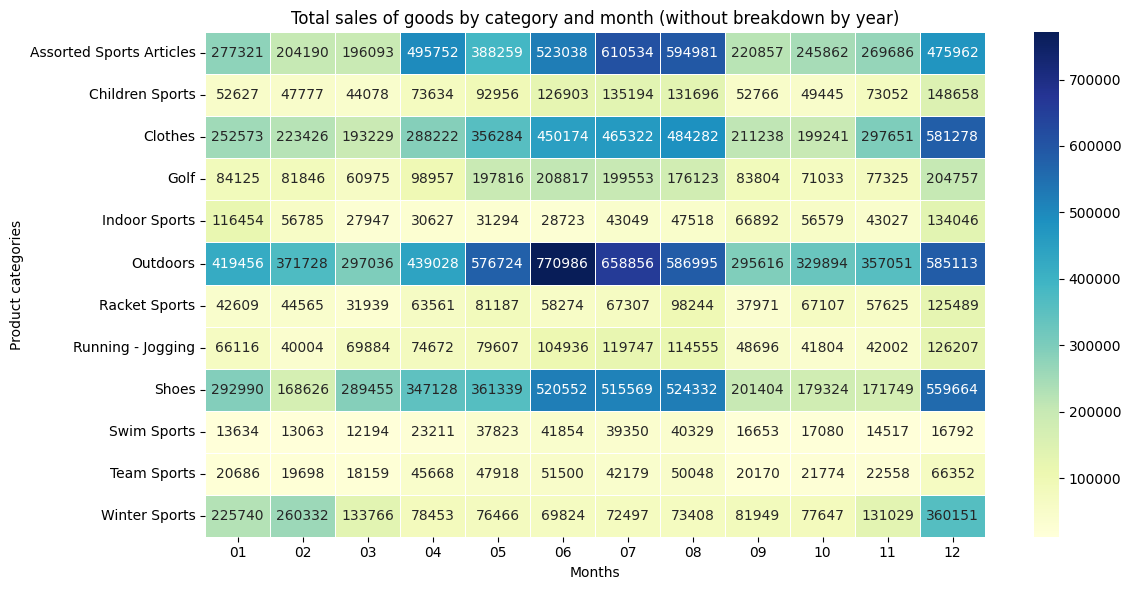

In [29]:
# Creating a column for a month without a year
merged_df['month'] = (
    merged_df['date_order_was_placed'].dt.month.astype(str).str.zfill(2)
)  # Format ММ (01, 02, ..., 12)

# We create a pivot table: months in columns, categories in rows, value - sales amount
plot_pivot_heatmap(
    merged_df, 
    values='total_retail_price_for_this_order', 
    index='product_category', 
    columns='month', 
    title="Total sales of goods by category and month (without breakdown by year)", 
    xlabel="Months", 
    ylabel="Product categories"
)


Conclusion: This pivot table clearly demonstrates the revenue by category in different months. Based on this data, marketing strategies can be planned. For example, products in the "Outdoors" category bring in the highest profit in June, while "Winter sports" are in demand during the winter months. At the same time, there are product categories that have approximately the same sales year-round and do not show significant seasonality, such as "Swim sports" and "Team sports."

Note: In the pivot table, the sales values are calculated as the sum of sales for each month by category for each year, since, as seen in the chart in question 2.4, sales grow annually at approximately the same rate.

### 2.8 Percentage distribution of revenue from sales of goods by categories and supplier countries

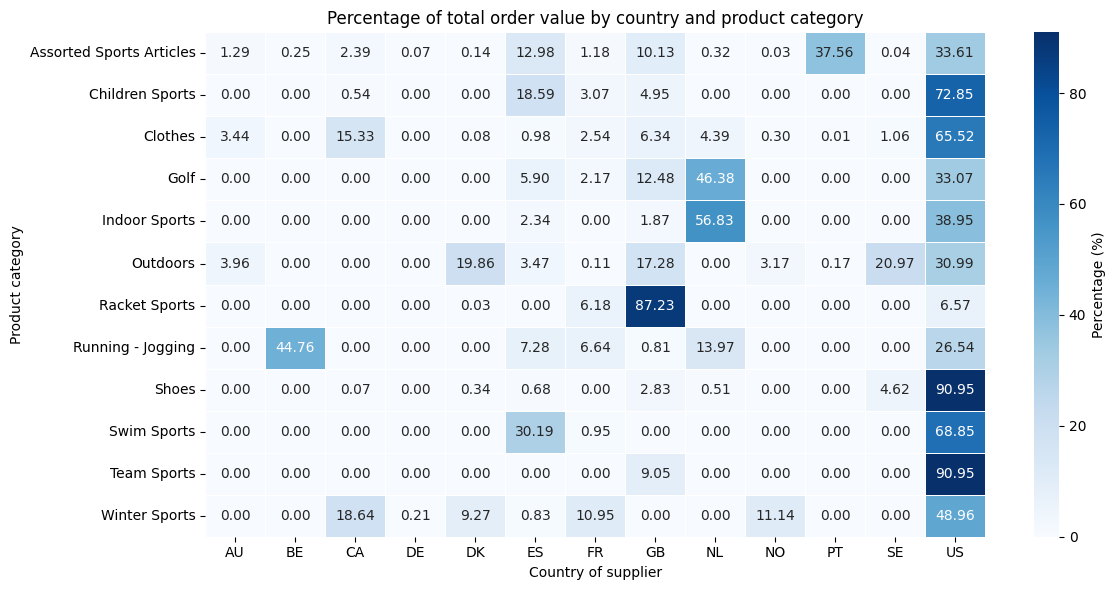

In [30]:
# Create a Pivot Table for the amount of ordered goods
plot_pivot_heatmap(
    merged_df, 
    values='total_retail_price_for_this_order', 
    index='product_category', 
    columns='supplier_country', 
    normalize=True, 
    title='Percentage of total order value by country and product category', 
    xlabel='Country of supplier', 
    ylabel='Product category',
    fmt='.2f', 
    cmap='Blues'
)

Conclusion: From the obtained pivot table, it is easy to determine which products are the most and least popular by supplier countries. For example, it is clearly visible that most products are ordered from the United States, while products in the "Racket Sports" category are mostly ordered from the United Kingdom.

### 2.9 Revenue analysis by supplier

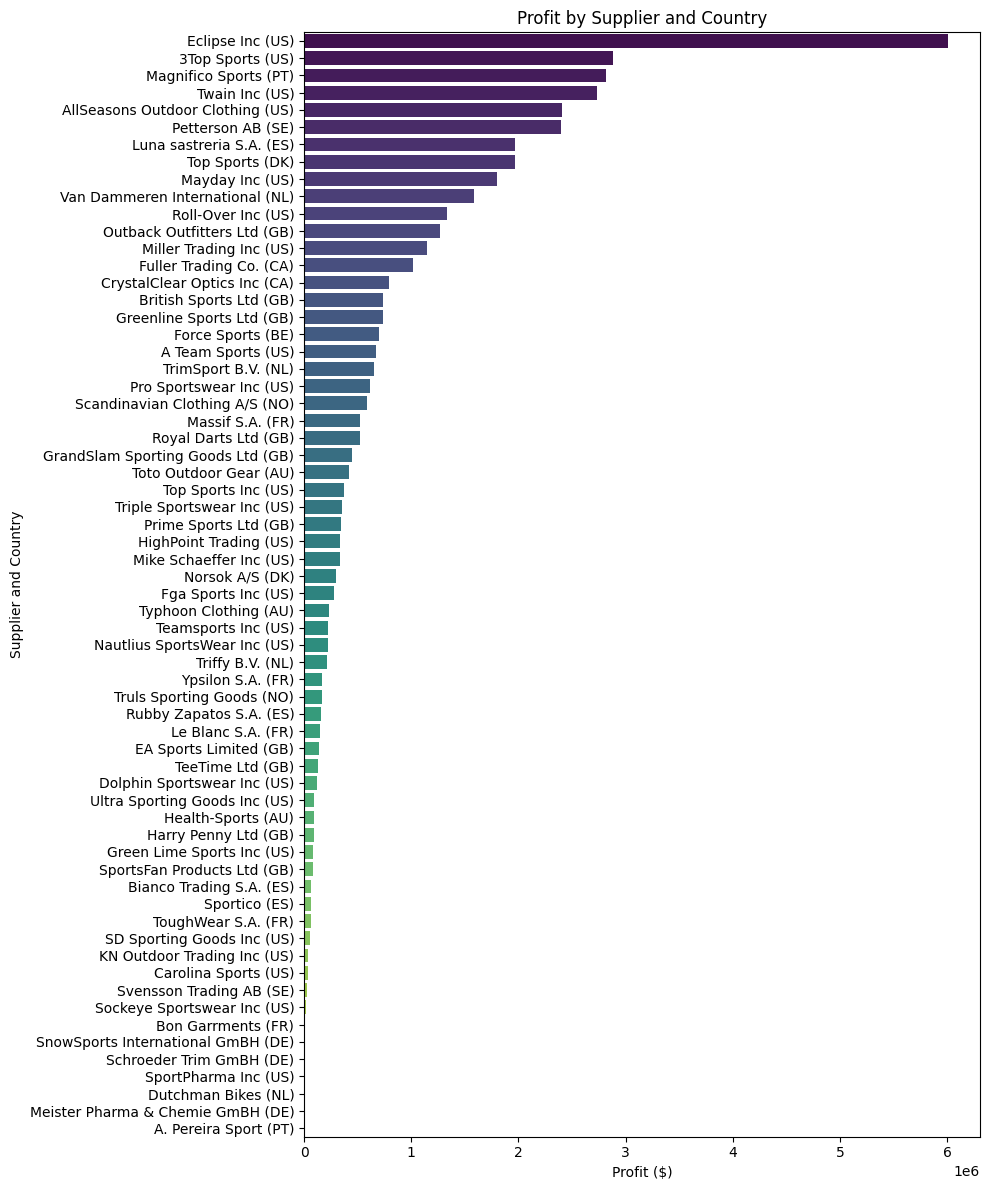

In [31]:
# Add a column with the amount for each product
merged_df['total_order_value'] = merged_df['quantity_ordered'] * merged_df['total_retail_price_for_this_order']

# Add a column for the cost of each product
merged_df['total_cost_value'] = merged_df['quantity_ordered'] * merged_df['cost_price_per_unit']

# We calculate profit (Order amount - Cost price)
merged_df['profit'] = merged_df['total_order_value'] - merged_df['total_cost_value']

# Create a new column that combines supplier and country
merged_df['supplier_name_country'] = (
    merged_df['supplier_name'] + ' (' + merged_df['supplier_country'] + ')'
)

# We group by suppliers and countries and calculate the total profit
profit_by_supplier_country = merged_df.groupby('supplier_name_country')['profit'].sum().reset_index()

# Sort by profit in descending order
profit_by_supplier_country = profit_by_supplier_country.sort_values(by='profit', ascending=False)

# Visualization: horizontal bar chart
plt.figure(figsize=(10, 12))
sns.barplot(
    data=profit_by_supplier_country,
    x='profit',
    y='supplier_name_country',
    hue='supplier_name_country',
    palette='viridis',
    legend=False
)

# Adding a title and captions
plt.title('Profit by Supplier and Country')
plt.xlabel('Profit ($)')
plt.ylabel('Supplier and Country')

# Display chart
plt.tight_layout()
plt.show()

Conclusion: The highest profits are observed from the companies "Eclipse Inc", "3Top Sports", "Magnifico Sport", "Twain Inc", and "AllSeasons Outdoor Clothing".

### 2.10 Which products are the most popular among suppliers with the highest profits?

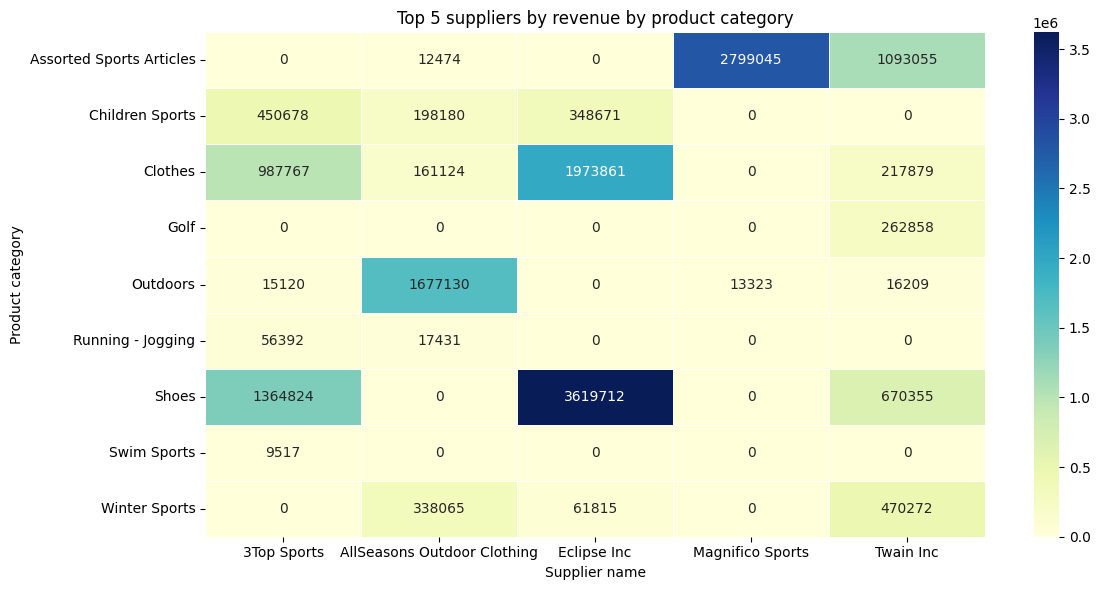

In [32]:
# Group by suppliers and categories and calculate the total profit
profit_by_supplier_category = merged_df.groupby(
    ['supplier_name', 'product_category'])['profit'].sum().reset_index()

# Find the top 5 suppliers with the highest profits
top_5_suppliers = profit_by_supplier_category.groupby(
    'supplier_name')['profit'].sum().nlargest(5).index

# Filter data for top 5 suppliers
top_5_profit_by_supplier_category = profit_by_supplier_category[
    profit_by_supplier_category['supplier_name'].isin(top_5_suppliers)
]

# Create a pivot table: suppliers as columns, categories as rows
plot_pivot_heatmap(
    top_5_profit_by_supplier_category, 
    values='profit', 
    index='product_category', 
    columns='supplier_name', 
    title='Top 5 suppliers by revenue by product category', 
    xlabel='Supplier name', 
    ylabel='Product category'
)

Conclusion: We have obtained a heatmap that demonstrates the product categories that sell the best and the worst among the top 5 suppliers. It is clear that for the supplier "3Top Sports," the best-selling products are in the "Shoes" category, while the worst are in "Swim Sports." For the supplier "AllSeasons Outdoor Clothing," the highest sales are in the "Outdoors" category, while the lowest are in "Assorted Sports Articles," and so on.

Note: A value of 0 indicates that the supplier does not carry that product category.

### 3. Conclusion

As a result of the analysis of supplier product sales data, an analysis of customers, sales, and supplier products was conducted.

The customer analysis revealed that the main audience consists of "Silver" and "Gold" status customers, which make up 48.2% and 47.4% of the total number of customers, respectively. These are the two main customer categories, which not only dominate in number but also generate the most revenue. The "Platinum" customer category makes up only 4.4% of the total number of customers, and their total order amount accounts for 2.3% of the overall sales.

The sales dynamics of products show that there is seasonality in orders. Historically, the worst periods are February-March and September-November, while April-August and December generate the highest revenue.

The supplier product analysis shows that there are four main product lines: "Sports" – 42.8%, "Clothes&Shoes" – 36.7%, "Children" – 14.0%, and "Outdoors" – 6.5%. The product category distribution reveals that the largest share of products belongs to the "Outdoors" category – 22.2%, while the smallest share is held by "Swim Sports" – only 1.1%.

Sales by month showed that certain categories perform better in specific months, while there are categories that generate approximately the same income year-round. For example, "Outdoors" products generate the highest profit in June, while "Winter sports" are in demand during the winter months. At the same time, some product categories, such as "Swim sports" and "Team sports," have approximately consistent sales year-round and do not exhibit clear seasonality.

The top 5 suppliers by profits were identified as:
 - Eclipse Inc;
 - 3Top Sports;
 - Magnifico Sport;
 - Twain Inc;
 - AllSeasons Outdoor Clothing.

Additionally, the best-selling product categories among these top 5 suppliers were identified:
 - "Shoes" for "3Top Sports";
 - "Outdoors" for "AllSeasons Outdoor Clothing";
 - "Shoes" for "Eclipse Inc";
 - "Assorted Sports Articles" длforя "Magnifico Sport";
 - "Assorted Sports Articles" для "Twain Inc".

На основі даних та візуалізацій отриманих протягом аналізу можна будувати маркетингові стратегії та планувати доходи, з врахуванням сезонності, покупців та категорії товарів постачальників.